# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# STFT

In diesem Notebook werden wir die STFT selbst implementieren.

Dafür verwenden wir die in der letzten Sitzung implementierte DFT-Funktion `calc_dft`:

In [4]:
def calc_dft(x):

    N = x.size
    n = np.arange(N)

    dft = np.zeros((N,), dtype=complex)

    for k in range(N):
        e = np.exp(-1 * 2 * np.pi * 1j * n * k / N)
        dft[k] = np.sum(x * e)
    
    return dft

<div style="background-color:lightyellow;border:solid grey;padding:10px">

**Aufgabe:**
    
Implementiert die Funktion `calc_stft`
    
*Tipps:*
- Erinnert euch an Session 2 ("Windowing")
- Die Ergebnisse der STFT sollen in einer Matrix (= multidimensionaler Array) gespeichert werden (siehe nächster Code-Block) --> Es bietet sich also an, einen leeren Array `stft` zu erstellen, in den man dann im Loop jeweils die Ergebnisse schreibt.
- `stft` muss also so viele Zeilen haben, wie das Fenster lang ist (`window_size`) und so viele Spalten haben, wie viele Fenster insgesamt berechnet werden (`num_wins`)
- Da das Ergebnis der DFT komplexe Zahlen liefert, müsst ihr mit dem `dtype`-keyword beim Erstellen des (numpy-)Arrays `complex` angeben.
- Innerhalb des Loops soll pro Fenster jeweils die DFT berechnet werden (verwendet hierfür `calc_dft` oder `np.fft.fft` - wie ihr mögt). Diese DFT soll dann in die jeweilige Spalte der `stft`-Matrix geschrieben werden --> erinnert euch daran, wie wir mit `a[start_y:stop_y, start_x:stop_x]` einen bestimmten Ausschnitt einer gegebenen Matrix (hier `a`) referenzieren können.

</div>

In [2]:
# f --> frequenz index
# t --> zeit index

np.array([['f0 t0', 'f0 t1', 'f0 t2', 'f0 t3', 'f0 t4', '...'], # freq_coef 0
          ['f1 t0', 'f1 t1', 'f1 t2', 'f1 t3', 'f1 t4', '...'], # freq_coef 1
          ['f2 t0', 'f2 t1', 'f2 t2', 'f2 t3', 'f2 t4', '...'], # freq_coef 2
          ['f3 t0', 'f3 t1', 'f3 t2', 'f3 t3', 'f3 t4', '...'], # freq_coef 3
          ['f4 t0', 'f4 t1', 'f4 t2', 'f4 t3', 'f4 t4', '...'], # freq_coef 4
          ['...',   '...',   '...',   '...',   '...',   '...']]) # ...
#           win 0    win 1    win 2    win 3    win 4    ...

array([['f0 t0', 'f0 t1', 'f0 t2', 'f0 t3', 'f0 t4', '...'],
       ['f1 t0', 'f1 t1', 'f1 t2', 'f1 t3', 'f1 t4', '...'],
       ['f2 t0', 'f2 t1', 'f2 t2', 'f2 t3', 'f2 t4', '...'],
       ['f3 t0', 'f3 t1', 'f3 t2', 'f3 t3', 'f3 t4', '...'],
       ['f4 t0', 'f4 t1', 'f4 t2', 'f4 t3', 'f4 t4', '...'],
       ['...', '...', '...', '...', '...', '...']], dtype='<U5')

In [171]:
def calc_stft(x, hop_size=200, window_size=500):
 
    num_wins = int((x.size-window_size)//hop_size);
    stft = np.zeros((window_size, num_wins,), dtype=complex);

    for i in range(num_wins):
        stft[0:window_size,i] = np.fft.fft(x[i*hop_size:(i*hop_size)+window_size]);     
    return stft



# x = np.ones(5*7,dtype = complex)
# stft = np.zeros((7,5),dtype = complex)
# print(stft)


# for i in range (5):
#     stft[0:7,i]=x[i*5:i*5+7]
# print(stft)

Nun können wir die STFT berechnen und plotten:

/Users/liujia/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


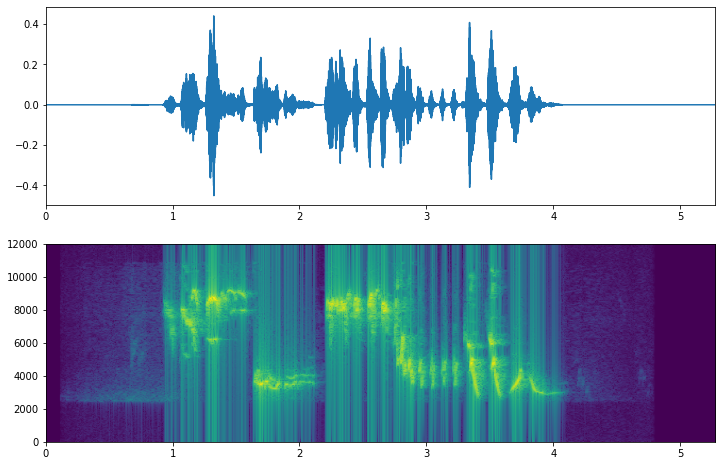

In [186]:
#x, sr = lr.load('../../data/violin.mp3', sr=None)
x, sr = lr.load('/Users/liujia/Desktop/MF_jupyter/Computergestuetzte-Musikforschung-WiSe_2020_21/CMF/07_dft_eigenschaften_implementierung/bird.mp3', sr=None)

stft = calc_stft(x)

display(Audio(x, rate=sr))

# plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
length = x.size / sr
t = np.linspace(0, length, x.size)
plt.plot(t, x)
plt.xlim(0, length)

plt.subplot(2, 1, 2)
# to dB
plt.imshow(10 * np.log10(np.abs(stft)+0.0001), aspect='auto', origin='lower', extent=[0, length, 0, sr])
#interessant hier hat man ein RuntimeWarning bekomen:RuntimeWarning: divide by zero encountered in log10
#ist das ein problem??(habe dann +0.0001 gemacht)
plt.ylim(0, sr / 2)

plt.show()

Überlegung für nächste Woche: Was passiert, wenn wir verschiedene window-sizes und hop_lengths verwenden?

hop_size:	12
window_size:	50


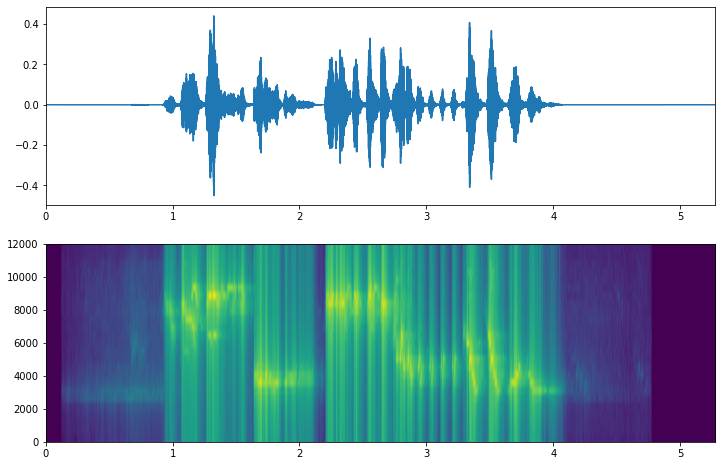

hop_size:	25
window_size:	50


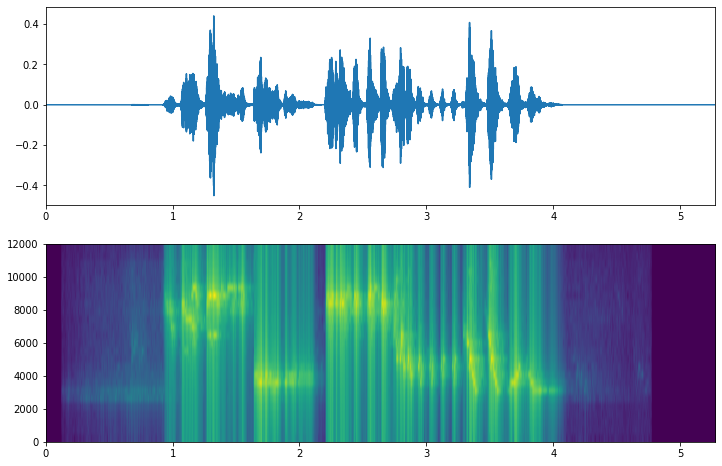

hop_size:	50
window_size:	200


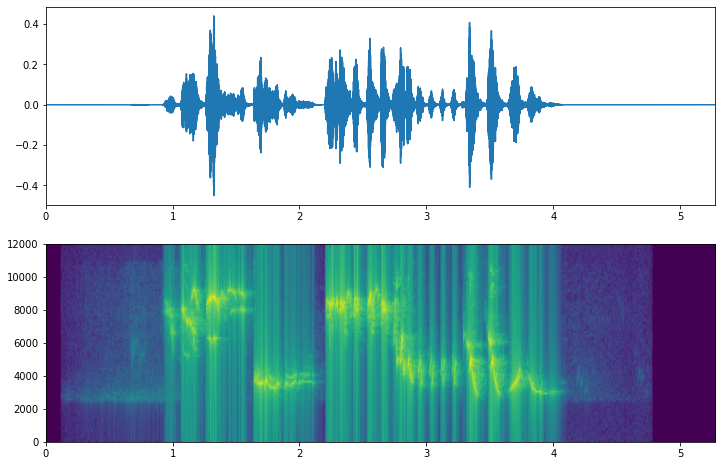

hop_size:	100
window_size:	200


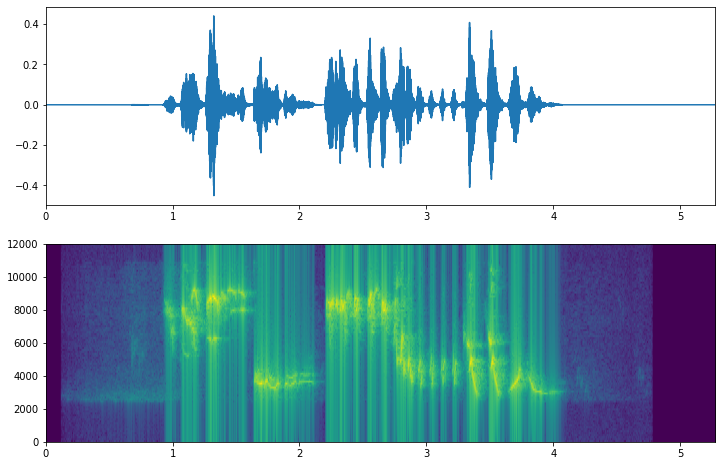

hop_size:	200
window_size:	800


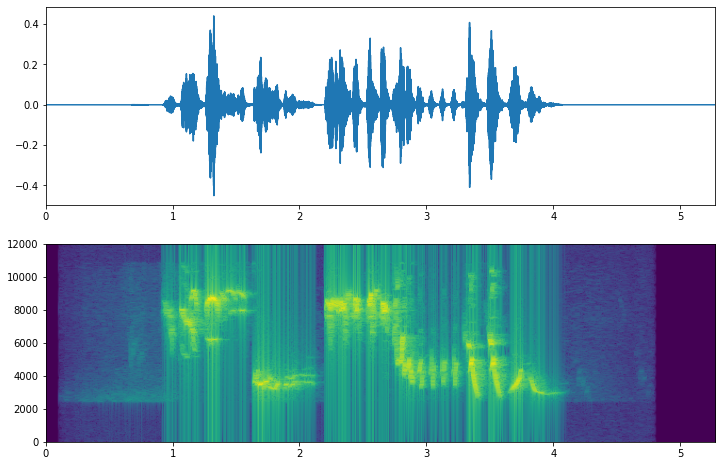

hop_size:	400
window_size:	800


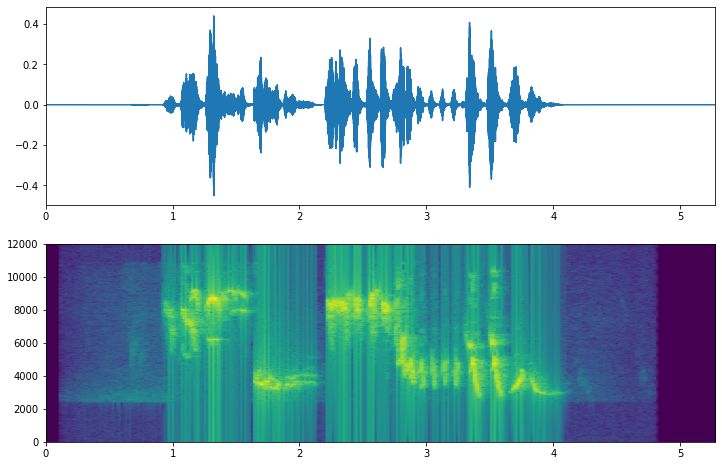

hop_size:	600
window_size:	2400


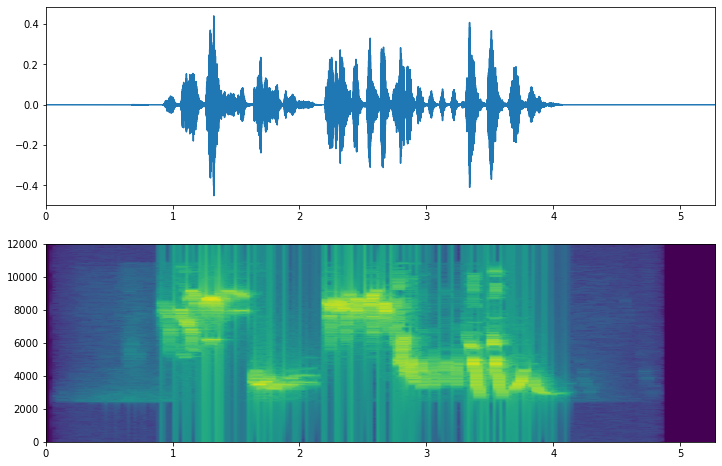

hop_size:	1200
window_size:	2400


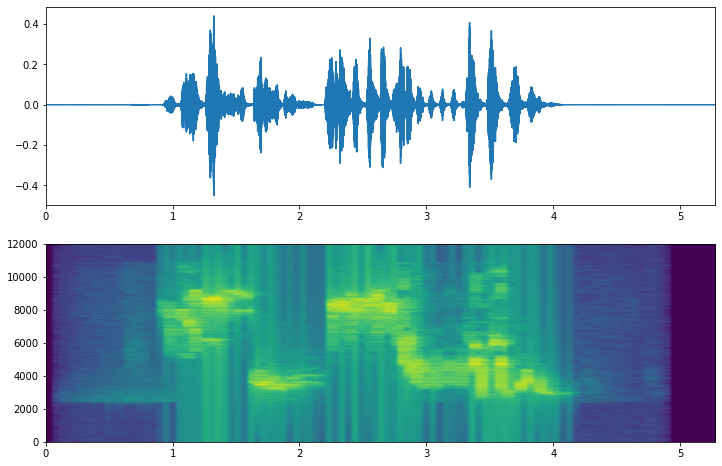

hop_size:	1200
window_size:	4800


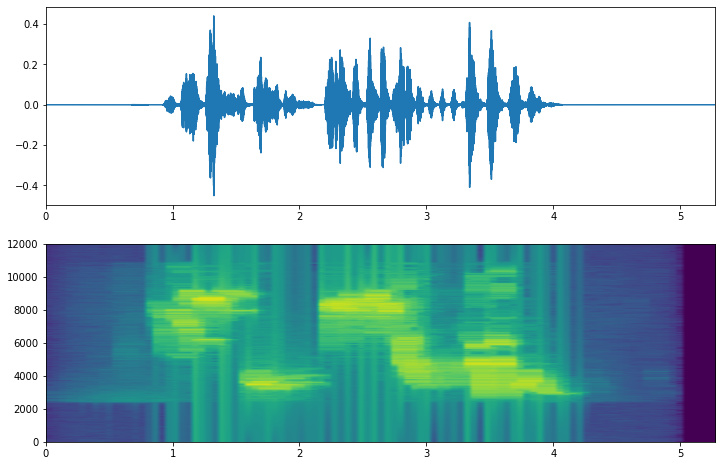

hop_size:	2400
window_size:	4800


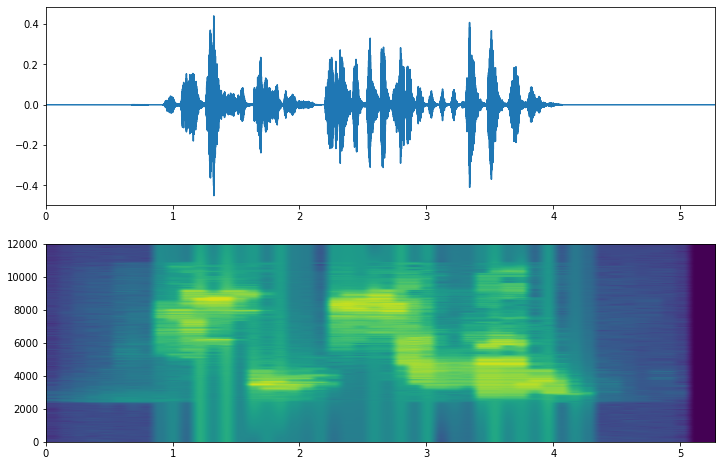

In [183]:
# ausführen dieses code-blocks kann ein bisschen dauern
# in stft-funktion lieber np.fft.fft verwenden
window_sizes = [50, 200, 800, 2400, 4800]
for window_size in window_sizes:

    hop_sizes = [window_size / 4, window_size / 2]
    for hop_size in hop_sizes:

        stft = calc_stft(x, hop_size=int(hop_size), window_size=int(window_size))

        print('hop_size:\t%d\nwindow_size:\t%d' % (hop_size, window_size))
        # plot
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 1, 1)
        length = x.size / sr
        t = np.linspace(0, length, x.size)
        plt.plot(t, x)
        plt.xlim(0, length)
        
        plt.subplot(2, 1, 2)
        # to dB
        plt.imshow(10 * np.log10(np.abs(stft)+0.00001), aspect='auto', origin='lower', extent=[0, np.shape(x)[0] / sr, 0, sr])
        plt.ylim(0, sr / 2)
        plt.show()